In [23]:
'''Importar las librerias usadas para este algoritmo.'''
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [24]:
'''Importar las librerias para realizar la matriz de confusión.'''
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [25]:
'''Importar la librerias para la visualizacion del arbol de decision'''
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

In [8]:
'''
Usaremos un dataset de muestra 
sobre pacientes con diabeters
con mas de  768 registros.'''
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
'''Determinar las variables: Caracteristicas y objetivo, es decir 'X' y 'y' '''

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols] # features
y = pima.Outcome # target

In [11]:
'''Código que realice la división en entrenamiento y 
test, de acuerdo con la estretgia de evaluación planeada.
En este caso, el tamano del testeo sera del 30%'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
'''Con ayuda de la libreria DecisionTreeClassifier, 
realizaremos el algoritmo de DecisionTree'''
clf = DecisionTreeClassifier()


In [18]:
'''Entrenamiento del modelo con 
la funcion fit, enviando los 
parametros de X,y'''
clf = clf.fit(X_train,y_train)


In [19]:
'''Prediccion del modelo mediante el 
arbol de decision y la libreria 
DecisionTreeClassifier'''
y_pred = clf.predict(X_test)

In [20]:
'''
Para obtener el Accuracy del modelo, 
usaremos la libreria Metrics de sklearn 
con los datos de prueba y los que predijo 
el modelo '''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [21]:
'''
Para obtener el Precision del modelo, 
usaremos la libreria Metrics de sklearn 
con los datos de prueba y los que predijo 
el modelo '''
print("Precision:", metrics.precision_score(y_test, y_pred))

Precision: 0.5753424657534246


In [22]:
'''
Para obtener el Recall del modelo, 
usaremos la libreria Metrics de sklearn 
con los datos de prueba y los que predijo 
el modelo '''
print("Recall:", metrics.recall_score(y_test, y_pred))

Recall: 0.49411764705882355


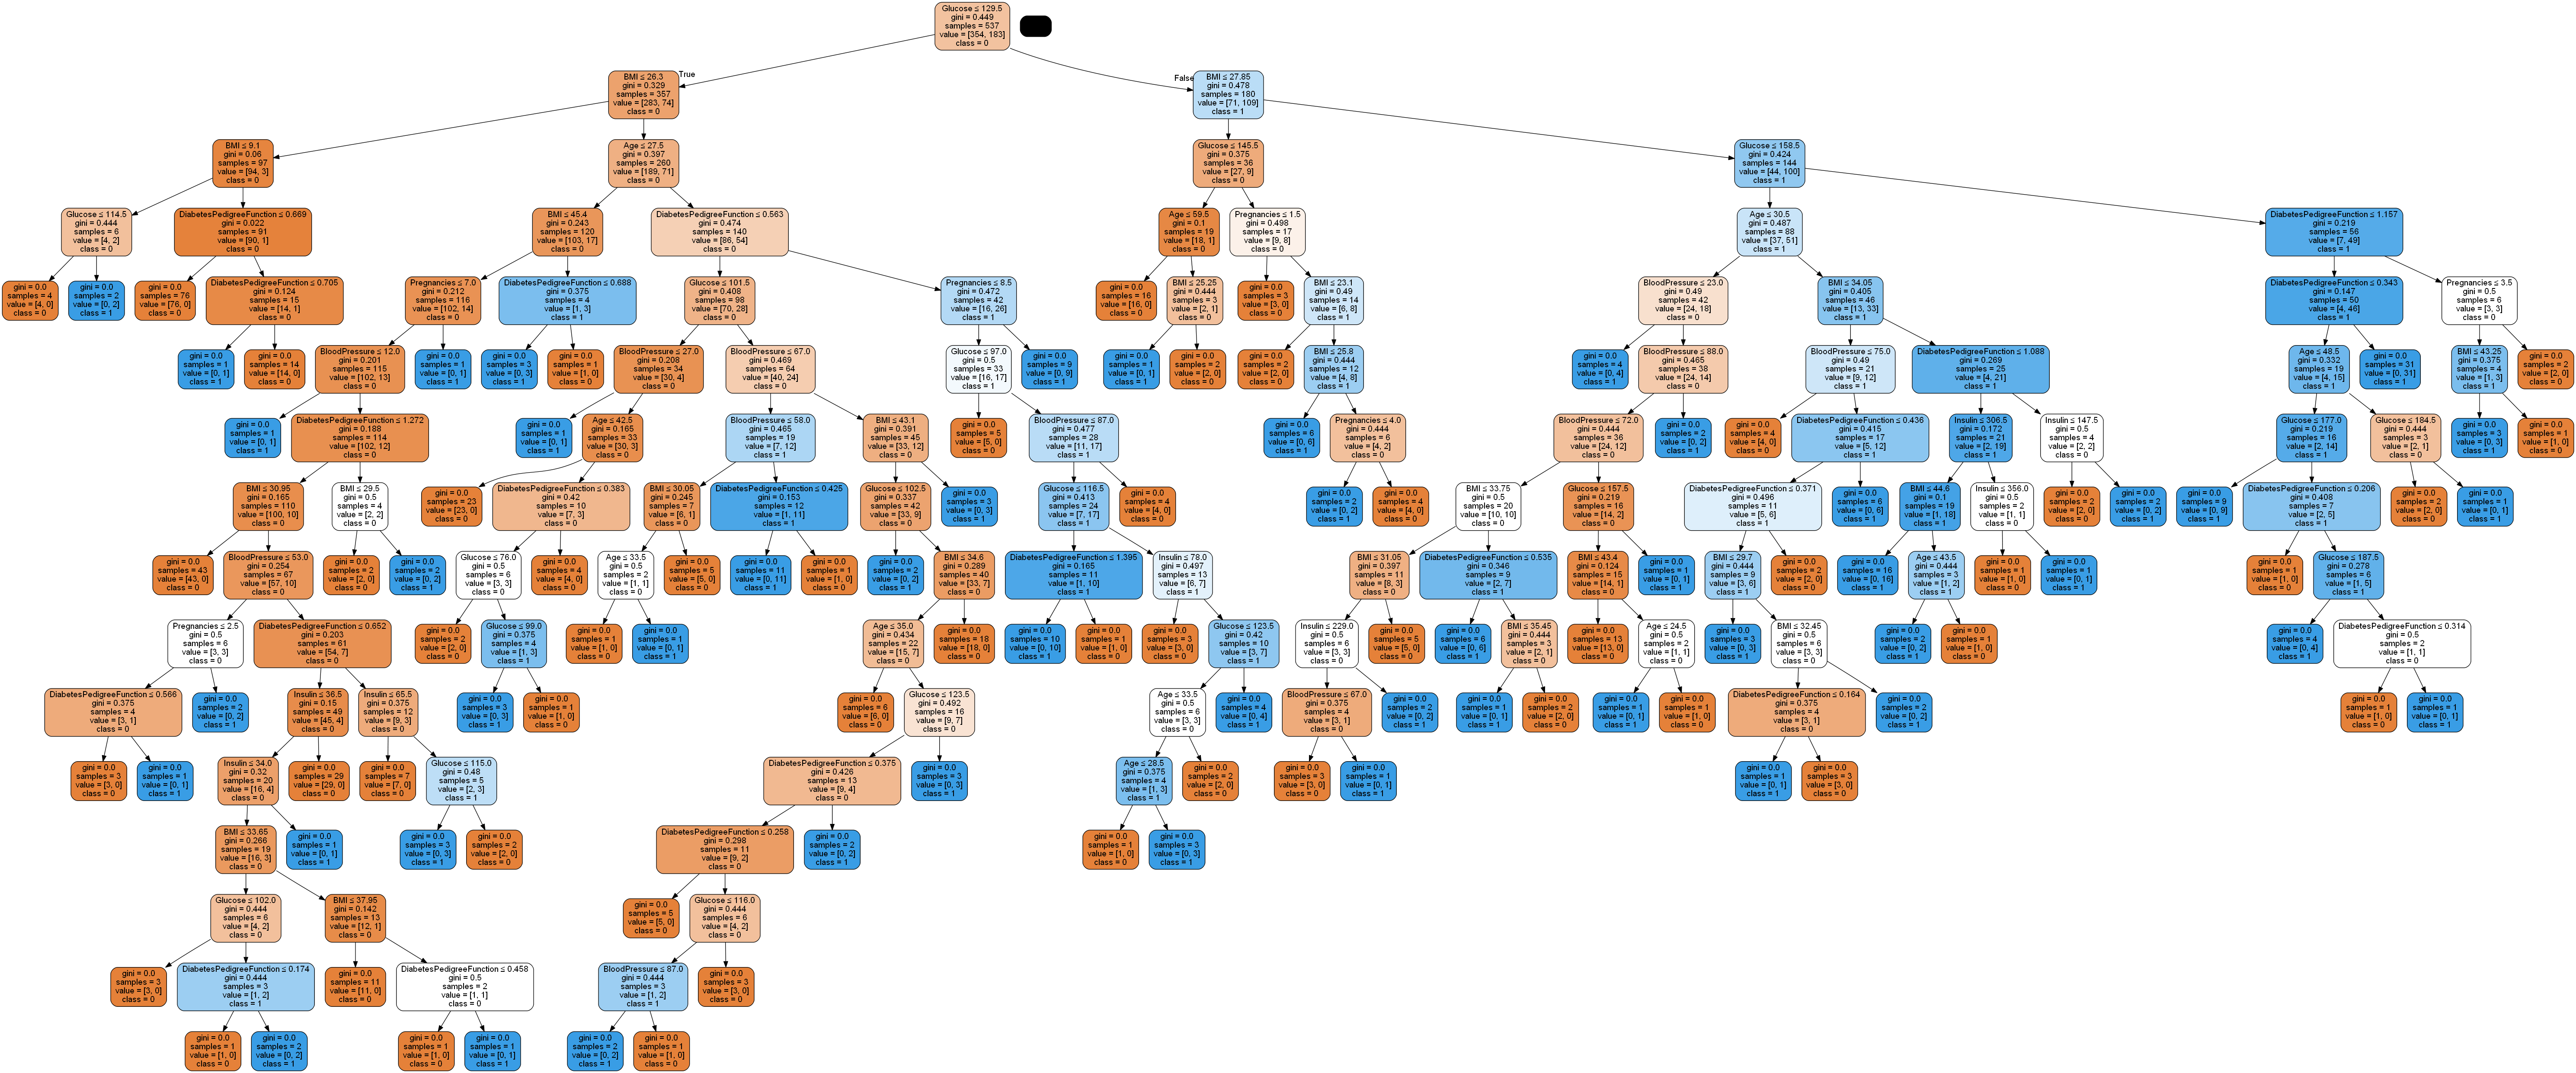

In [26]:
'''Visualizar el arbol de decision'''
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [27]:
'''Con ayuda de la libreria DecisionTreeClassifier, 
realizaremos el algoritmo de DecisionTree, con una 
profundidad de 3 niveles para observar el 
comportamiento de los datos. Del mismo modo, se usara
un hiperparametro de entrada para podar el arbol y hacerlo
mas acertado.'''
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)


In [28]:
'''Entrenamiento del modelo con 
la funcion fit, enviando los 
parametros de X,y'''
clf = clf.fit(X_train,y_train)


In [29]:
'''Prediccion del modelo mediante el 
arbol de decision y la libreria 
DecisionTreeClassifier'''
y_pred = clf.predict(X_test)

In [30]:
'''
Para obtener el Accuracy del modelo, 
usaremos la libreria Metrics de sklearn 
con los datos de prueba y los que predijo 
el modelo '''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [31]:
'''
Para obtener el Precision del modelo, 
usaremos la libreria Metrics de sklearn 
con los datos de prueba y los que predijo 
el modelo '''
print("Precision:", metrics.precision_score(y_test, y_pred))

Precision: 0.7105263157894737


In [32]:
'''
Para obtener el Recall del modelo, 
usaremos la libreria Metrics de sklearn 
con los datos de prueba y los que predijo 
el modelo '''
print("Recall:", metrics.recall_score(y_test, y_pred))

Recall: 0.6352941176470588


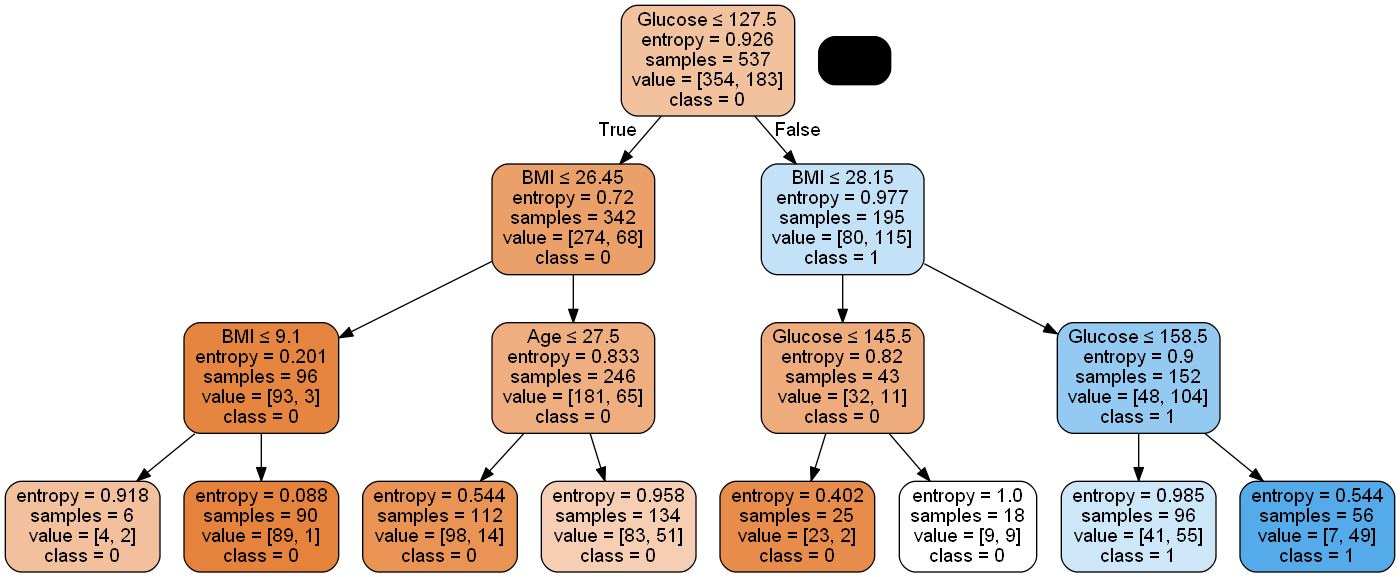

In [33]:
'''Visualizacion del arbol pre-prunned'''
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

In [34]:
'''Mediante la libreria de sklearn, 
creamos la matriz de confusion con 
los datos de 'y_test' y 'y_pred'''
cm = confusion_matrix(y_test, y_pred)

In [35]:
'''Insertar los nombres de y para la matriz de confusion'''
cm_df = pd.DataFrame(cm,
                     index = ['No iene diabetes', 'Tiene diabetes'], 
                     columns = ['No tiene diabetes', 'Tiene diabetes'])

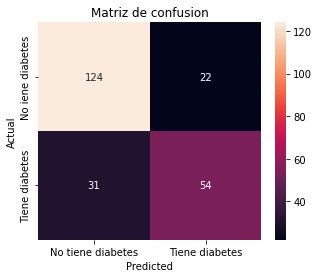

In [36]:
'''Mostrar la matriz creada, 
esto con ayuda de la libreria 
seaborn para realizar un heatmap 
de los datos...'''
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Matriz de confusion')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()